In [0]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('elegant.mplstyle')

In [0]:
import numpy as np

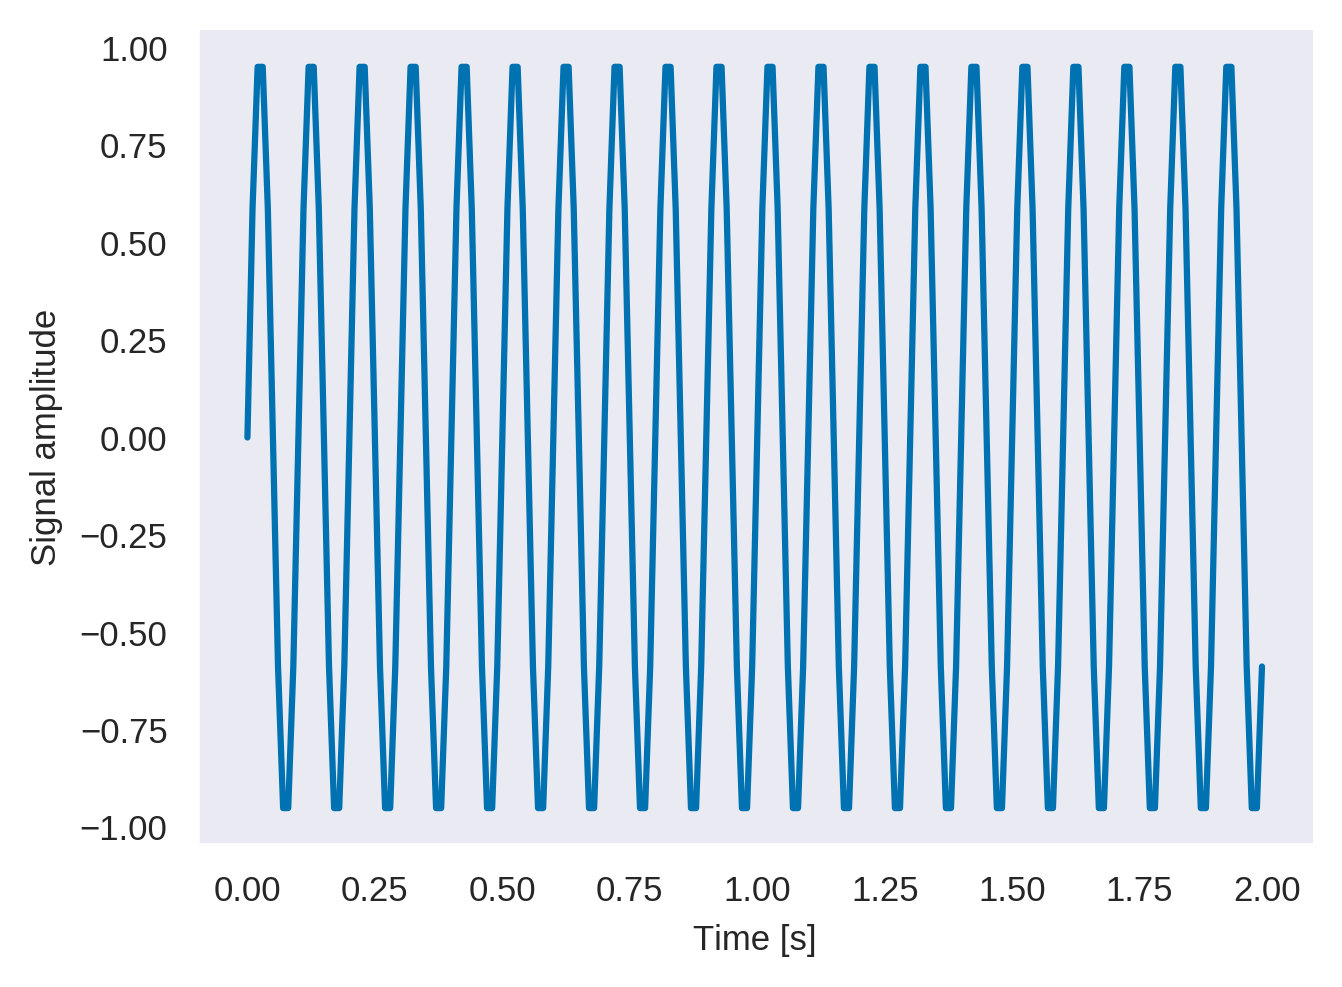

In [5]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-5, 110)

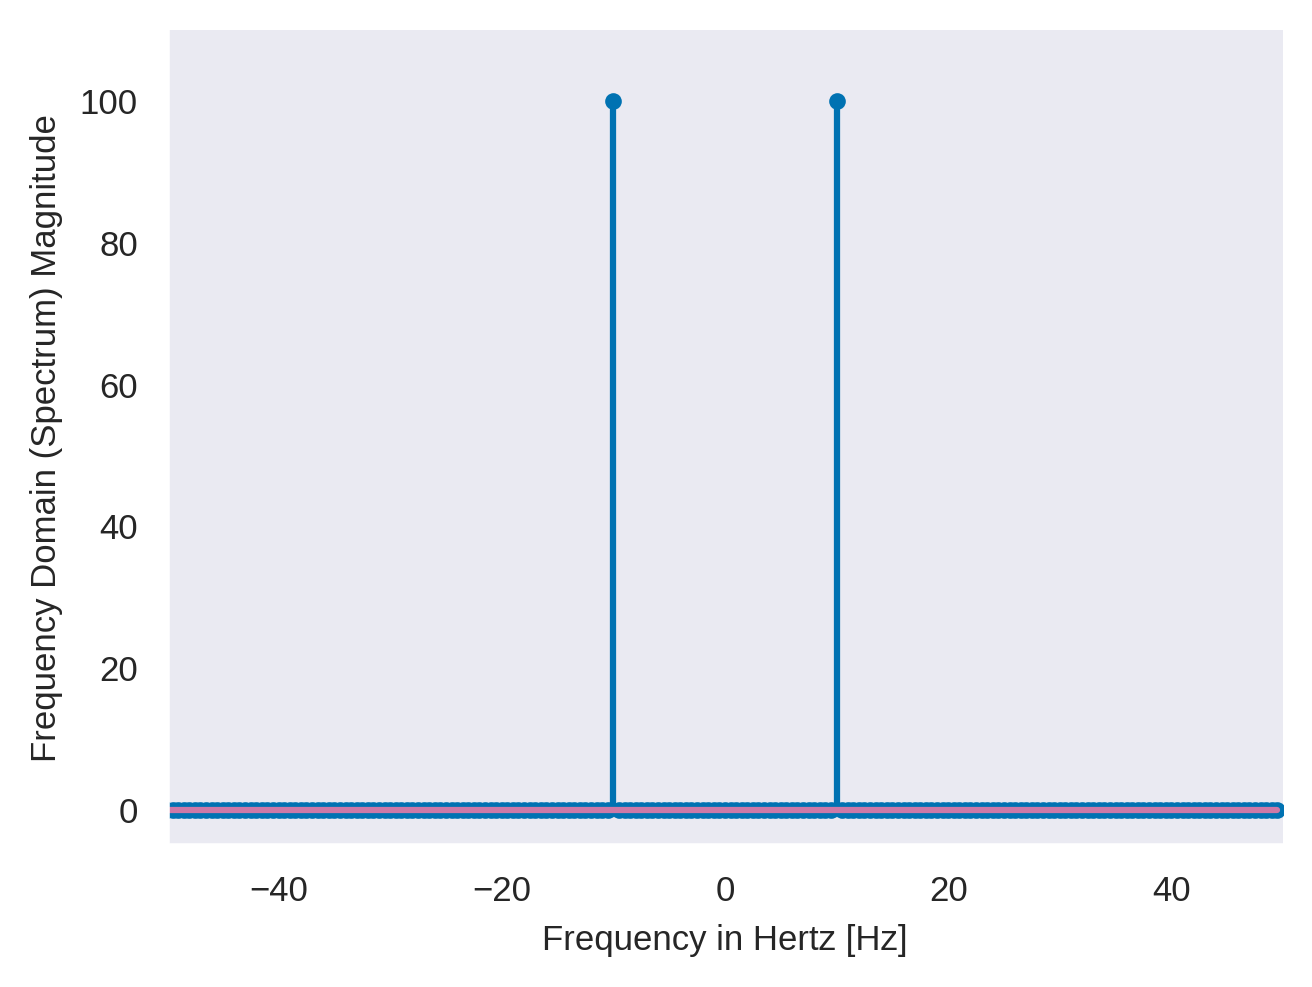

In [6]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [10]:
from IPython.display import Audio
Audio('Nightingale-sound.mp3')

In [0]:
from scipy.io import wavfile

rate, audio = wavfile.read('Nightingale.wav')

In [0]:
# We convert to mono by averaging the left and right channels.
audio = np.mean(audio, axis=1)

Audio length: 73.18 seconds


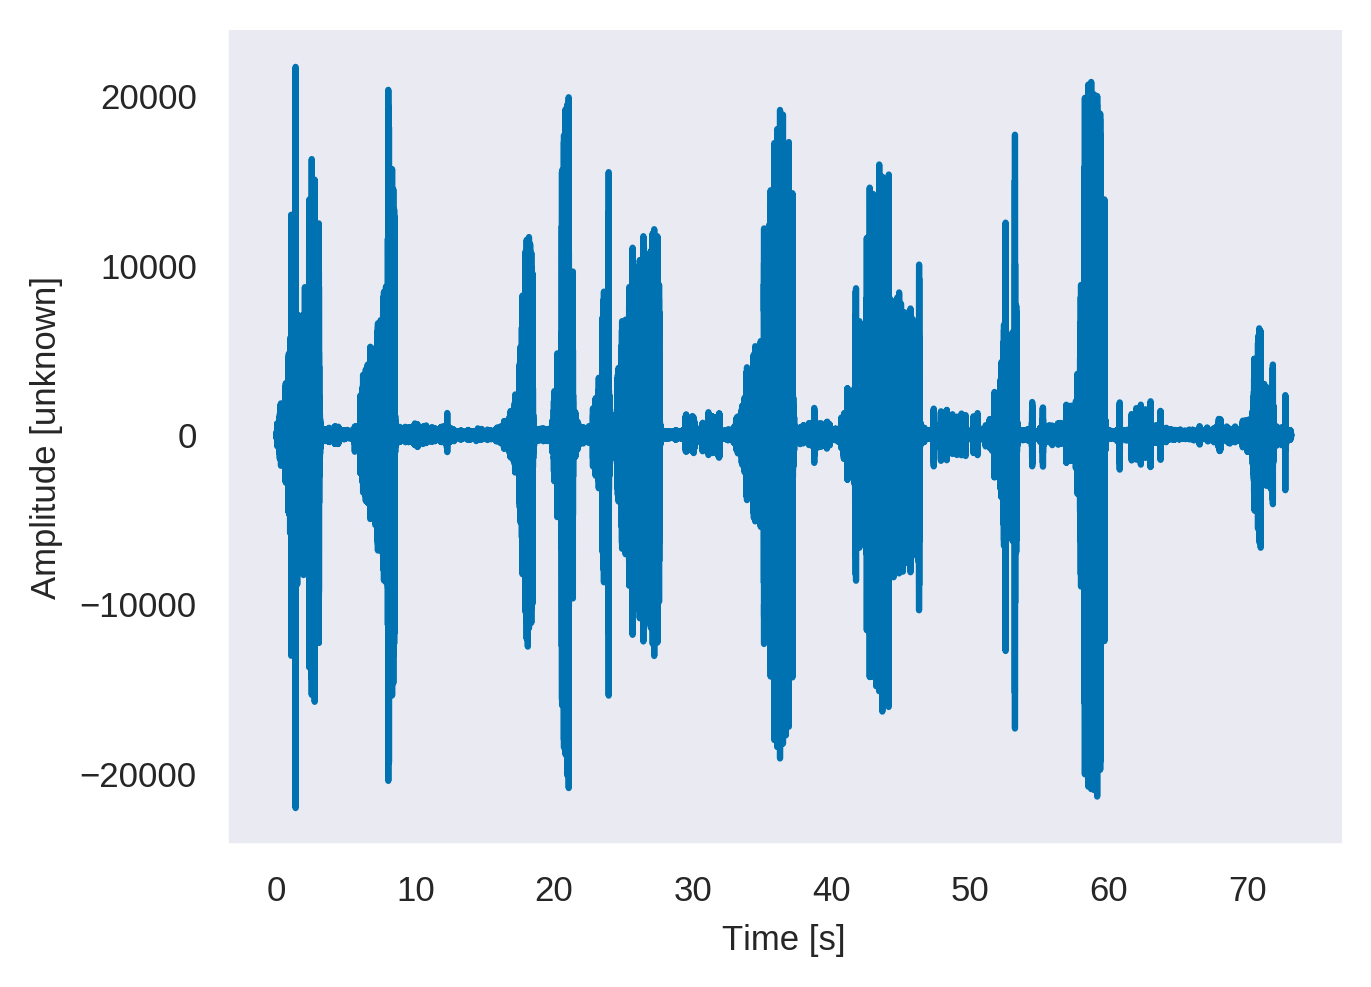

In [19]:
# Then, we calculate the length of the snippet and plot the audio (Figure 4-2).
N = audio.shape[0]
L = N / rate
print(f'Audio length: {L:.2f} seconds')
f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

In [20]:
from skimage import util
M = 1024
slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (3227451,), Sliced audio shape: (32265, 1024)


In [0]:
win = np.hanning(M + 1)[:-1]
slices = slices * win

In [22]:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 32265)


In [0]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

88

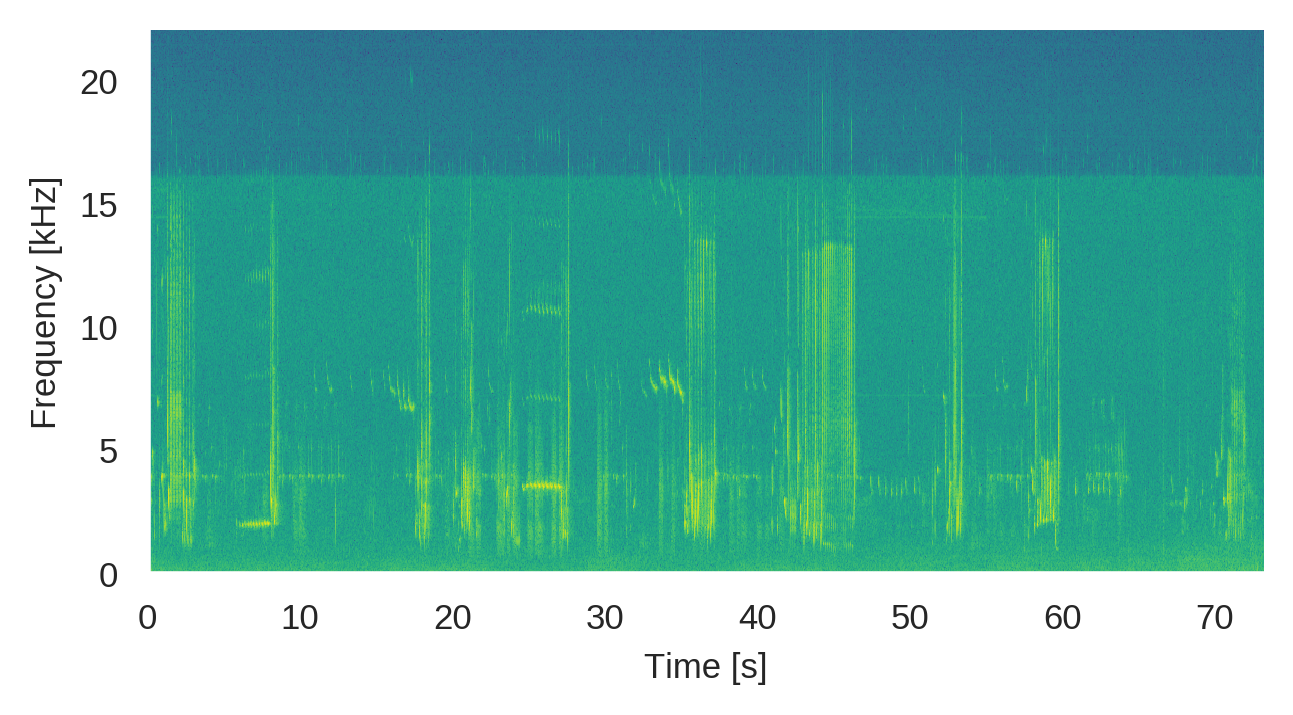

In [24]:
f, ax = plt.subplots(figsize=(4.8, 2.4))
S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))
ax.imshow(S, origin='lower', cmap='viridis',
extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

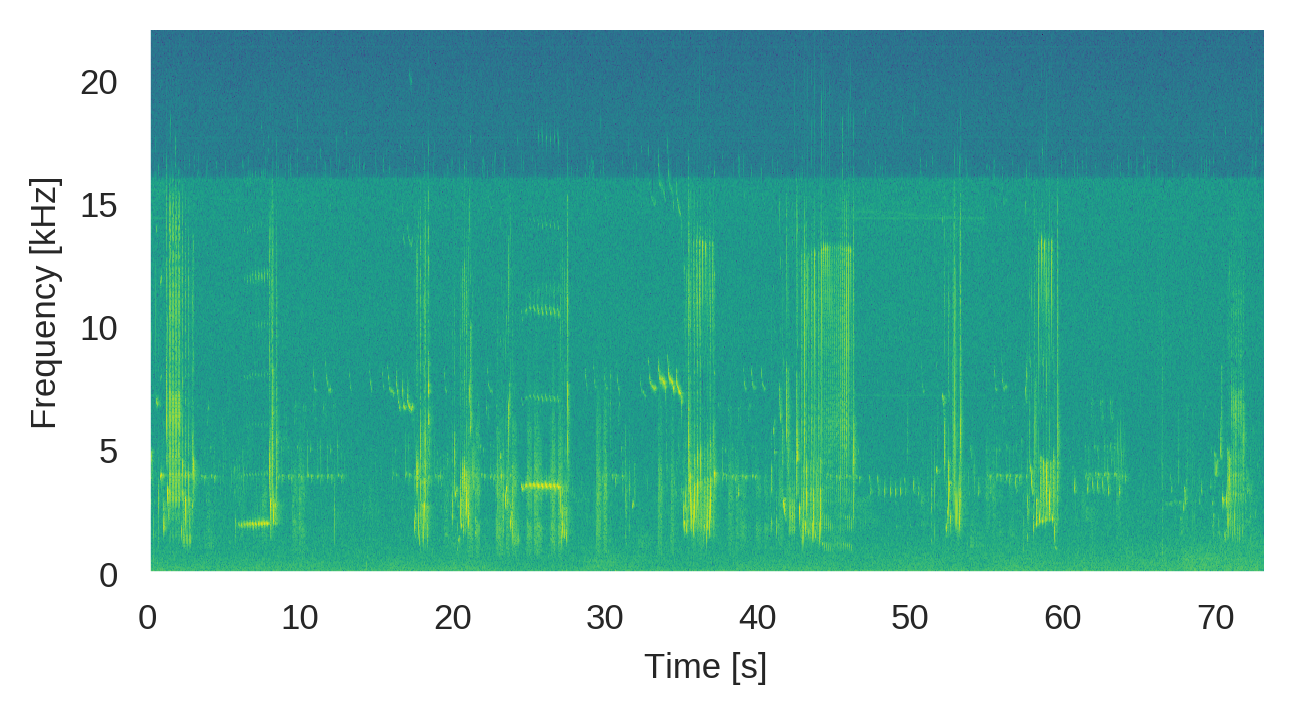

In [25]:
from scipy import signal
freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
nperseg=1024, noverlap=M - 100,
detrend=False, scaling='spectrum')
f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');